In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-08-07 06:51:49--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.2’

moore.csv.2         100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-08-07 06:51:49 (47.5 MB/s) - ‘moore.csv.2’ saved [2302/2302]



In [ ]:
data = pd.read_csv('moore.csv',header=None).values
X = data[:,0].reshape(-1,1)
Y = data[:,1]

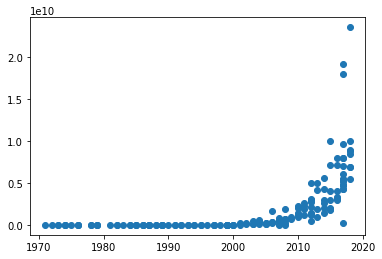

In [ ]:
plt.scatter(X,Y)

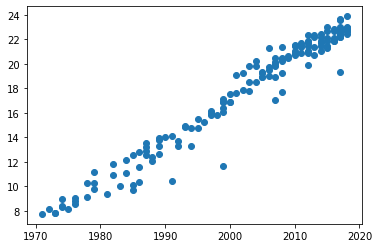

In [ ]:
#Required transformation understood by the visible exponential growth
Y = np.log(Y)
plt.scatter(X,Y)

In [ ]:
#Centering the X at 0 , scaling by division os not feasible here
X = X - X.mean()

In [ ]:
#Creating the Model
model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape = (1,)),
        tf.keras.layers.Dense(1)
])

model.compile(optimizer = tf.keras.optimizers.SGD(0.001,0.9),
              loss='mse')

#Learning rate scheduler
def schedule(epoch,lr) :
    if epoch >= 50 : 
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X,Y,epochs = 200 , callbacks=scheduler )

Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 699.5185
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 651.4406
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 277.8386
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 226.3339
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 216.9881
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 173.6407
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 118.3394
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 86.9751
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 53.6837
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 35.6804
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 26.2470
Epoch 12/200
6/6 [==============================] - 0s 1ms/step - loss: 18.3945
Epoch 13/200
6/6 [========================

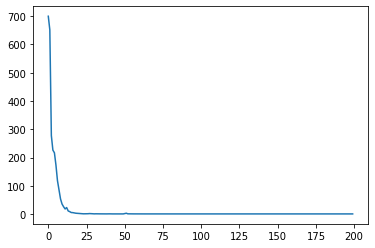

In [ ]:
plt.plot(r.history['loss'] , label = 'loss')

In [ ]:
#Getting the slope of line
#The slope os the line is related to the doubling rate of the transistor count
print(model.layers)                         #Input layer doesn't count
print(model.layers[0].get_weights())

[array([[0.34234968]], dtype=float32), array([17.766811], dtype=float32)]


In [ ]:
a = model.layers[0].get_weights()[0][0,0]

In [ ]:
print('Time to double',np.log(2)/a)

Time to double 2.024676009764342


## **Making Predictions**

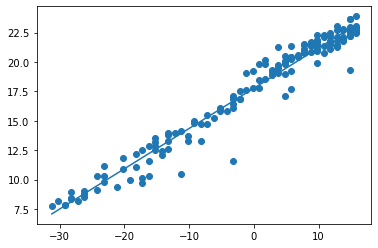

In [ ]:
Y_hat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,Y_hat)

In [15]:
W , b = model.layers[0].get_weights()
X = X.reshape(-1,1)     #resahping because last time it was flattened
Y_hat2 = (X.dot(W) + b).flatten()

np.allclose(Y_hat,Y_hat2)

True